> 
# Project: inestagating TMDB 5000 Movie Dataset


<a id='intro'></a>
## Introduction
This data set contains information 5000+ movies collected from The Movie Database (TMDb), including user ratings and revenue and many movies features

**questions**


1.   what are the attributes associated with movies popularity
2.   what are the attributes associated with high voting rate
3.   is there a relation between release year and movies popularity



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [3]:
#loading the data
df1=pd.read_csv('tmdb-movies.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4954 non-null   int64  
 1   imdb_id               4947 non-null   object 
 2   popularity            4954 non-null   float64
 3   budget                4954 non-null   int64  
 4   revenue               4954 non-null   int64  
 5   original_title        4954 non-null   object 
 6   cast                  4903 non-null   object 
 7   homepage              1992 non-null   object 
 8   director              4921 non-null   object 
 9   tagline               3476 non-null   object 
 10  keywords              4053 non-null   object 
 11  overview              4949 non-null   object 
 12  runtime               4953 non-null   float64
 13  genres                4940 non-null   object 
 14  production_companies  4418 non-null   object 
 15  release_date         

In [4]:
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09


In [ ]:
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 


* drop columns with null values and columns that are needed for the analysis

* drop rows with zero values from the runtime column 

* replace zeroes with null values in (budget and revenue ) columns 
* drop duplicates


* drop null values from columns that contain few null values






In [5]:
# dopping columns with null values and columns that are not necessary for the analysis
df1.isnull().sum()
df1.drop(['homepage','tagline','keywords','imdb_id','overview','budget_adj','revenue_adj'],axis=1,inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4954 non-null   int64  
 1   popularity            4954 non-null   float64
 2   budget                4954 non-null   int64  
 3   revenue               4954 non-null   int64  
 4   original_title        4954 non-null   object 
 5   cast                  4903 non-null   object 
 6   director              4921 non-null   object 
 7   runtime               4953 non-null   float64
 8   genres                4940 non-null   object 
 9   production_companies  4418 non-null   object 
 10  release_date          4953 non-null   object 
 11  vote_count            4953 non-null   float64
 12  vote_average          4953 non-null   float64
 13  release_year          4953 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 542.0+ KB


In [6]:
#checking columns with zero values(budget,revenue,runtime)
#counting the values of zero in budget 
df_zero_count=df1.groupby('budget').count()['id']
df_zero_count.head(2)

budget
0    2693
1       4
Name: id, dtype: int64

In [7]:
#counting the values of zero in revenue 
df_zero_count=df1.groupby('revenue').count()['id']
df_zero_count.head(2)

revenue
0    2928
3       2
Name: id, dtype: int64

In [8]:
#counting the values of zero in runtime 
df_zero_count=df1.groupby('runtime').count()['id']
df_zero_count.head(2)

runtime
0.0    21
2.0     2
Name: id, dtype: int64

so after noticing and analyzing  the zero values in the columns (budget,revenue,runtime) it is clear that these values are missing data as these movies were actually released , and after counting zero values  in the columns (budget,revenue) it was too many that we can not drop them se we are going to replace them with null values ,but in runtime it was only 31 records with missing value so we will drop them  

In [9]:
#filtering the runtime column from zero values  
df1.query('runtime != 0', inplace=True)
df1.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [10]:
#replacing zero with null values in budget and revenue columns
df1['budget'] = df1['budget'].replace(0, np.NaN)
df1['revenue'] = df1['revenue'].replace(0, np.NaN)

In [11]:
#checking zero values in revenue and budget
df_Zero=df1.query('revenue == 0')
df_Zero.head()
df_Zero=df1.query('budget == 0')
df_Zero.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [12]:
# drop duplicates
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum())

0


In [13]:
# drop null values from (cast,directors,gener)
df1.dropna(subset = ['cast', 'director', 'genres'], how='any', inplace=True)
# checking if the dataframe contains null values
df1.isnull().sum()

id                         0
popularity                 0
budget                  2597
revenue                 2826
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies     475
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
#changing the datatype of the data
df1['release_date'] = pd.to_datetime(df1['release_date'])
# #changing budget and revenue to int
# df1.budget = df1.budget.astype(float)
# #changing revenue to float
# df1.revenue = df1.revenue.astype(float)


In [15]:
# checking data after cleaning
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4846 entries, 0 to 4952
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4846 non-null   int64         
 1   popularity            4846 non-null   float64       
 2   budget                2249 non-null   float64       
 3   revenue               2020 non-null   float64       
 4   original_title        4846 non-null   object        
 5   cast                  4846 non-null   object        
 6   director              4846 non-null   object        
 7   runtime               4846 non-null   float64       
 8   genres                4846 non-null   object        
 9   production_companies  4371 non-null   object        
 10  release_date          4846 non-null   datetime64[ns]
 11  vote_count            4846 non-null   float64       
 12  vote_average          4846 non-null   float64       
 13  release_year      

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015.0
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185.0,7.1,2015.0
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480.0,6.3,2015.0
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292.0,7.5,2015.0
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947.0,7.3,2015.0


from the table above we still have columns with null value (production companies,budget,revenue),but these columns are necessary for our analysis so we couldn't drop them 

In [16]:
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,4846.000000,4846.000000,2.249000e+03,2.020000e+03,4846.000000,4846.000000,4846.000000,4846.000000
mean,103770.429014,0.740322,3.490367e+07,1.058013e+08,100.827074,267.690466,5.901362,2008.844408
std,109871.304335,1.303852,4.425084e+07,1.962550e+08,33.982807,706.676658,0.978300,6.370350
min,11.000000,0.001317,1.000000e+00,3.000000e+00,3.000000,10.000000,2.000000,1977.000000
25%,17318.500000,0.211844,6.800000e+06,4.632390e+06,90.000000,18.000000,5.300000,2008.000000
50%,52450.000000,0.397848,2.000000e+07,3.357216e+07,97.000000,43.000000,5.900000,2010.000000
75%,171127.250000,0.777407,4.500000e+07,1.124678e+08,109.000000,180.750000,6.600000,2014.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


so after cleaning the data the distibutions of the budget and revenue are much better , also the runtime dosn't have a zero valus anymore 

<a id='eda'></a>
## Exploratory Data Analysis

> 
###  Question 1 
what are the proprties associated with popular movies


In [17]:
# turning numerical columns into catagorical
def to_catagorical(df,column_name):
# deviding popular into catagories 
  min_value = df1['popularity'].min()
  first_quantile = df1['popularity'].describe()[4]
  second_quantile = df1['popularity'].describe()[5]
  third_quantile = df1['popularity'].describe()[6]
  max_value = df1['popularity'].max()
  name = '{}_new'.format(column_name)
  df[name]=pd.cut(df[column_name],bins=[min_value,first_quantile , second_quantile, third_quantile , max_value], labels=['low','moderatly_low','moderatly_high','high'],include_lowest=True) 
  return df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 586 to 4705
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    18 non-null     int64         
 1   popularity            18 non-null     float64       
 2   budget                18 non-null     float64       
 3   revenue               6 non-null      float64       
 4   original_title        18 non-null     object        
 5   cast                  18 non-null     object        
 6   director              18 non-null     object        
 7   runtime               18 non-null     float64       
 8   genres                18 non-null     object        
 9   production_companies  16 non-null     object        
 10  release_date          18 non-null     datetime64[ns]
 11  vote_count            18 non-null     float64       
 12  vote_average          18 non-null     float64       
 13  release_year      

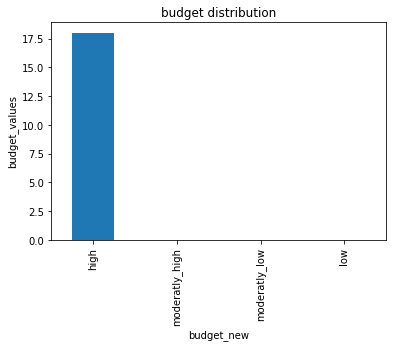

In [76]:
# turning popularity to a catagorical values
to_catagorical(df1,'popularity')
# turning revenue to catagorical
to_catagorical(df1,'revenue')
# turning budget into catagorical
to_catagorical(df1,'budget')
# turning runtime to catagorical
to_catagorical(df1,'runtime')
df1['budget_new'].value_counts().plot(kind='bar',ylabel='budget_values',xlabel='budget_new',title='budget distribution')
#selecting only high revenue
df_budget=df1.query("budget_new== 'high'")
df_budget.info()



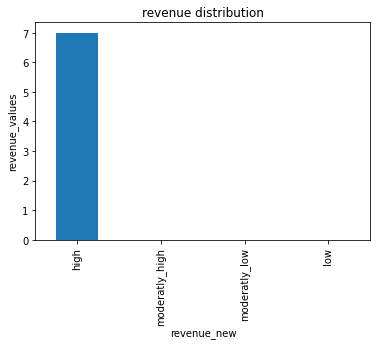

In [75]:
df1['revenue_new'].value_counts().plot(kind='bar',ylabel='revenue_values',xlabel='revenue_new',title='revenue distribution')

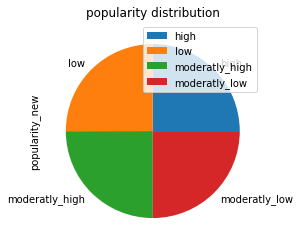

In [77]:
df1['popularity_new'].value_counts().plot(kind='pie',title='popularity distribution',legend=True)

from the previous analysis and the distribution of the budget and revenue data due to the big amount of missing data they only contain data that are calssifid as high budget and high revenue respectivly,so this will limit the direction of our analysis as we are going to analyiz the relationship between these high values only and the popularity

relationship between popularity and  high budget

In [21]:
result_median = df_budget.groupby('budget_new')['popularity'].median()
result_median 

budget_new
low                   NaN
moderatly_low         NaN
moderatly_high        NaN
high              0.20603
Name: popularity, dtype: float64

visualizing

In [23]:
# the x locations for the groups
ind = np.arange(len(result_median))  
# the width of the bars
width = 0.5       
ind

array([0, 1, 2, 3])

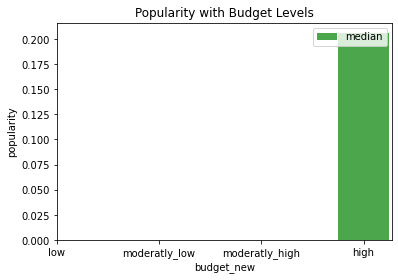

In [25]:
bars = plt.bar(ind, result_median, width, color='g', alpha=.7, label='median')

# title and labels
plt.ylabel('popularity')
plt.xlabel('budget_new')
plt.title('Popularity with Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

from the figure above,althogh we couldn't compare low bugget values with the popularity ,but we still can get insights from the plot that high budget movies are very popular,

relationship between high runtime and poularity

In [26]:
to_catagorical(df1,'runtime')
result_median = df1.groupby('runtime_new')['popularity'].median()
result_median

runtime_new
low                   NaN
moderatly_low         NaN
moderatly_high        NaN
high              0.34123
Name: popularity, dtype: float64

visaulizing the relation ship between runtime and popularity

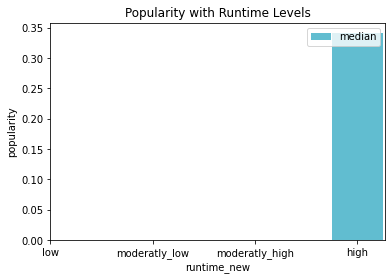

In [27]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')
# title and labels
plt.ylabel('popularity')
plt.xlabel('runtime_new')
plt.title('Popularity with Runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

so from the figure above although we still have the same problem we only have data for high runtime , it is obvious that movies with high runtime are very popular

analyzing the relationship between popularity and revenue

In [28]:
result_median = df1.groupby('revenue_new')['popularity'].median()
result_median

revenue_new
low                    NaN
moderatly_low          NaN
moderatly_high         NaN
high              0.316117
Name: popularity, dtype: float64

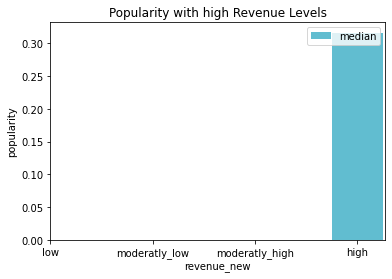

In [29]:
ind = np.arange(len(result_median))  # the x locations for the groups
width = 0.5       # the width of the bars
bars = plt.bar(ind, result_median, width, color='#1ea2bc', alpha=.7, label='median')
# title and labels
plt.ylabel('popularity')
plt.xlabel('revenue_new')
plt.title('Popularity with high Revenue Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend() 

from the figure above,we can conclude that the popular movies have a very high revenue.

**note**: we used the median to plot instead of the mean beacause poularity has many outliers




 **Question** 2  (properties associated with rating vote) 

relationship between budget and voting rate

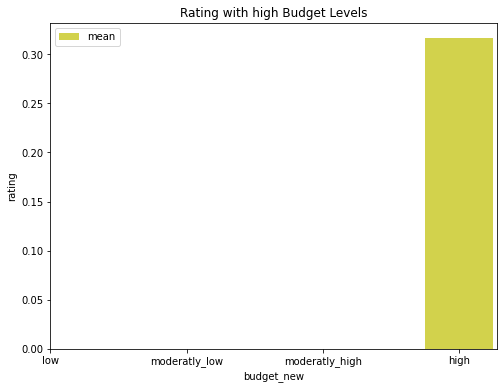

In [30]:
result_mean = df1.groupby('budget_new')['vote_average'].mean()
result_mean
#visualizing
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_median, width, color='y', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('budget_new')
plt.title('Rating with high Budget Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left') 

from above fighure,high budget movies has higher voting rate

relationship between high revenue and voting rate

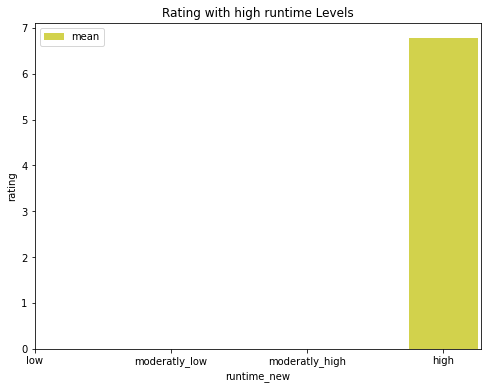

In [31]:
result_mean = df1.groupby('runtime_new')['vote_average'].mean()
result_mean
#visualizing
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_mean, width, color='y', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('runtime_new')
plt.title('Rating with high runtime Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left') 


from plot above,high runtime movies has a high voting rate 

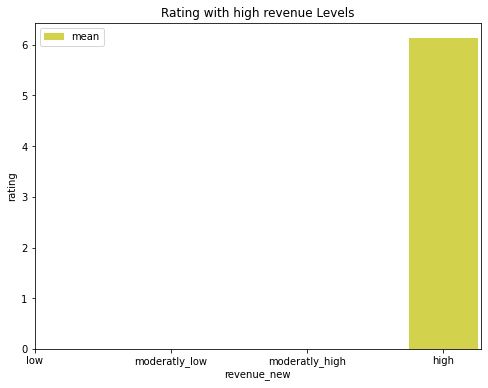

In [32]:
result_mean = df1.groupby('revenue_new')['vote_average'].mean()
result_mean
#visualizing
ind = np.arange(len(result_mean))  # the x locations for the groups
width = 0.5       # the width of the bars

# plot bars
plt.subplots(figsize=(8, 6))
bars = plt.bar(ind, result_mean, width, color='y', alpha=.7, label='mean')

# title and labels
plt.ylabel('rating')
plt.xlabel('revenue_new')
plt.title('Rating with high revenue Levels')
locations = ind  # xtick locations，345...
labels = result_median.index  
plt.xticks(locations, labels)
# legend
plt.legend( loc='upper left') 


from plot above,high revenue movies has a high voting rate 

**relationship between popularity and release year**

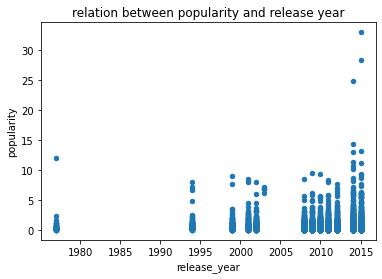

In [78]:
#relationship between release year and popularity
p_median= df1.groupby('release_year').median()['popularity']
p_median.tail()
df1.plot(x='release_year',y='popularity',kind='scatter',title='relation between popularity and release year') 



from the plot above there is no coloretion between popularity and release year ,but we can see that the most popular movies ever were concentrated in the year 2015

**conclusion**






*   movies with high budget are highly popular
*   movies with higher runtime are very popular

*   popular movies has a high revenue
*   movies with high budget has high voting rate

*   movies with high runtime have a higher voting rate

*   movies with high revenue has a high voting rate
*   there is no relationship between the release year and the movie popularity .










**limitations**


1.   a lot of zero values in budget,revenue and runtime columns which are missing values so eventually in these columns we ended only with one catagory of data in these columns (high)
2.  many columns contained missing values(keywords,cast,directors,tagline,gener,production companies) which some of them would have been useful for our analysis



websites:geeks for geeks,stackoverflow,meduim

In [70]:
!jupyter nbconvert --to html investigate_TMDP_Movie_dataset.ipynb

[NbConvertApp] Converting notebook investigate_TMDP_Movie_dataset.ipynb to html
[NbConvertApp] Writing 464533 bytes to investigate_TMDP_Movie_dataset.html
